In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Load the dataset
file_path = 'filtered_weather_data.csv'
weather_data = pd.read_csv(file_path)


In [30]:
# Display basic information and the first few rows
print("Dataset Information:")
weather_data.info()
print("\nFirst five rows of the dataset:")
print(weather_data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217442 entries, 0 to 217441
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dt_iso      217442 non-null  object 
 1   temp        217442 non-null  float64
 2   visibility  205466 non-null  float64
 3   dew_point   217442 non-null  float64
 4   feels_like  217442 non-null  float64
 5   pressure    217442 non-null  int64  
 6   humidity    217442 non-null  int64  
 7   wind_speed  217442 non-null  float64
 8   wind_deg    217442 non-null  int64  
 9   rain_1h     76279 non-null   float64
 10  clouds_all  217442 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 18.2+ MB

First five rows of the dataset:
          dt_iso   temp  visibility  dew_point  feels_like  pressure  \
0  1/1/2000 0:00  20.83     10000.0      19.66       21.40      1016   
1  1/1/2000 1:00  21.12      6000.0      19.05       21.59      1017   
2  1/1/200

In [32]:
# Convert 'dt_iso' to datetime format and aggregate daily rainfall data
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], errors='coerce')
weather_data['date'] = pd.to_datetime(weather_data['dt_iso'].dt.date)  # Convert directly to datetime64 format


In [34]:
# Group by 'date' to calculate total daily rainfall
daily_rainfall = weather_data.groupby('date')['rain_1h'].sum().reset_index()

# Display basic statistics for daily rainfall
print("\nStatistics of daily rainfall:")
print(daily_rainfall['rain_1h'].describe())



Statistics of daily rainfall:
count    8766.000000
mean        9.491321
std        18.834472
min         0.000000
25%         0.680000
50%         3.600000
75%        10.747500
max       326.580000
Name: rain_1h, dtype: float64


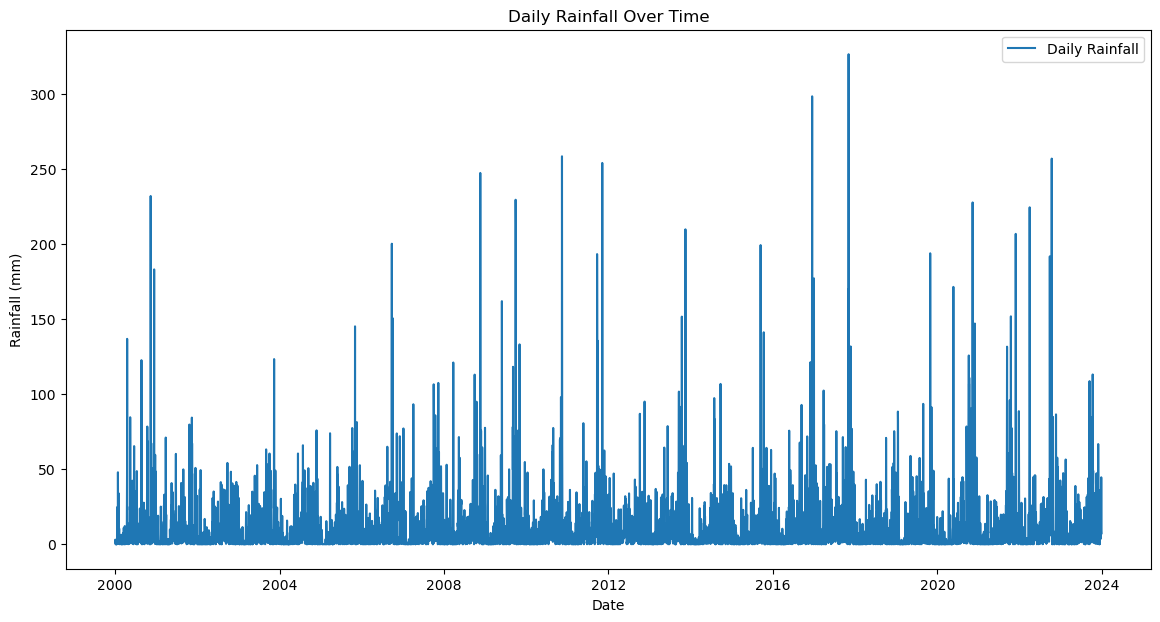

In [36]:
# Plot daily rainfall over time to visualize trend and seasonality
plt.figure(figsize=(14, 7))
plt.plot(daily_rainfall['date'], daily_rainfall['rain_1h'], label='Daily Rainfall')
plt.title('Daily Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

In [40]:
# Compute the correlation matrix for the dataset
correlation_matrix = weather_data.corr()
# Display the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)



Correlation matrix:
              dt_iso      temp  visibility  dew_point  feels_like  pressure  \
dt_iso      1.000000  0.088096   -0.003831   0.023693    0.088672  0.030815   
temp        0.088096  1.000000    0.472947   0.533218    0.960901 -0.790614   
visibility -0.003831  0.472947    1.000000   0.096974    0.474437 -0.393425   
dew_point   0.023693  0.533218    0.096974   1.000000    0.612801 -0.592624   
feels_like  0.088672  0.960901    0.474437   0.612801    1.000000 -0.788964   
pressure    0.030815 -0.790614   -0.393425  -0.592624   -0.788964  1.000000   
humidity   -0.079079 -0.556046   -0.448550   0.398696   -0.445877  0.273230   
wind_speed  0.039619  0.118394   -0.006807  -0.226164    0.065612 -0.004866   
wind_deg    0.076574 -0.104757    0.021379  -0.074740   -0.085341  0.061020   
rain_1h     0.015313  0.106557   -0.125228   0.185822    0.101271 -0.206078   
clouds_all -0.061196 -0.273805   -0.302610  -0.071558   -0.253128  0.160838   
date        1.000000  0.088122 

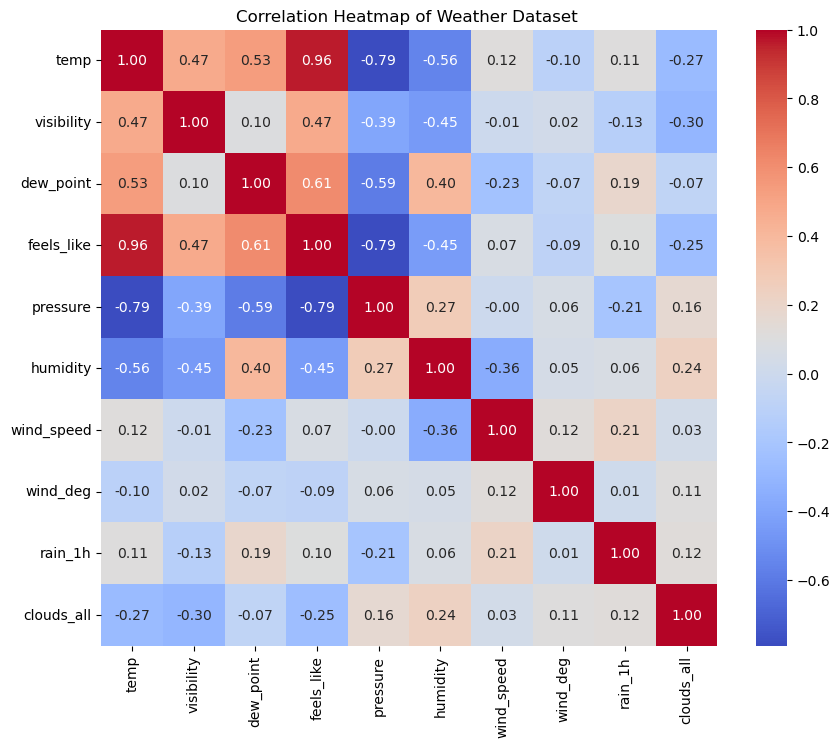

,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all
temp,1.000000,0.472947,0.533218,0.960901,-0.790614,-0.556046,0.118394,-0.104757,0.106557,-0.273805
visibility,0.472947,1.000000,0.096974,0.474437,-0.393425,-0.448550,-0.006807,0.021379,-0.125228,-0.302610
dew_point,0.533218,0.096974,1.000000,0.612801,-0.592624,0.398696,-0.226164,-0.074740,0.185822,-0.071558
feels_like,0.960901,0.474437,0.612801,1.000000,-0.788964,-0.445877,0.065612,-0.085341,0.101271,-0.253128
pressure,-0.790614,-0.393425,-0.592624,-0.788964,1.000000,0.273230,-0.004866,0.061020,-0.206078,0.160838
humidity,-0.556046,-0.448550,0.398696,-0.445877,0.273230,1.000000,-0.357277,0.048673,0.064003,0.235415
wind_speed,0.118394,-0.006807,-0.226164,0.065612,-0.004866,-0.357277,1.000000,0.121878,0.213734,0.031629
wind_deg,-0.104757,0.021379,-0.074740,-0.085341,0.061020,0.048673,0.121878,1.000000,0.009997,0.110744
rain_1h,0.106557,-0.125228,0.185822,0.101271,-0.206078,0.064003,0.213734,0.009997,1.000000,0.124650
clouds_all,-0.273805,-0.302610,-0.071558,-0.253128,0.160838,0.235415,0.031629,0.110744,0.124650,1.000000


In [48]:
# Remove 'dt_iso' and 'date' columns before recalculating the correlation matrix
weather_data_no_dt = weather_data.drop(columns=['dt_iso', 'date'])  # Remove 'date' as well, since it's not numerical
correlation_matrix_cleaned = weather_data_no_dt.corr()

# Display and plot the cleaned correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Weather Dataset ")
plt.show()

correlation_matrix_cleaned


In [46]:
# Normalize the rainfall data for potential use in time-series modeling
scaler = MinMaxScaler(feature_range=(0, 1))
lstm_data = scaler.fit_transform(daily_rainfall['rain_1h'].values.reshape(-1, 1))

# Split data into 60% training, 20% validation, and 20% testing (if building model later)
train_size = int(len(lstm_data) * 0.6)
val_size = int(len(lstm_data) * 0.2)
test_size = len(lstm_data) - train_size - val_size

train_data = lstm_data[:train_size]
val_data = lstm_data[train_size:train_size + val_size]
test_data = lstm_data[train_size + val_size:]

# Summary of findings from EDA
print("\nSummary of Findings:")
print("1. Daily rainfall data has large fluctuations with occasional high peaks, indicating potential seasonality or randomness.")
print("2. Correlation analysis shows high correlations between variables like temp and feels_like, while rain has weak correlations with other variables.")
print("3. The high variability and low correlation of rain with other features make LSTM suitable, as it can capture complex temporal dependencies.")


Summary of Findings:
1. Daily rainfall data has large fluctuations with occasional high peaks, indicating potential seasonality or randomness.
2. Correlation analysis shows high correlations between variables like temp and feels_like, while rain has weak correlations with other variables.
3. The high variability and low correlation of rain with other features make LSTM suitable, as it can capture complex temporal dependencies.
